# 数据生成代码

## train 训练集

In [1]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt

In [2]:
# 常量设定
hbar = 1.0  # 普朗克常数，或者任何常数
grid_size = (128, 128, 128)  # 网格大小，可以根据需要调整
num_samples = 200  # 数据集样本数量

In [3]:
# 文件路径
output_dir = "data/processed/train"
velocity_dir = os.path.join(output_dir, "velocities")
abcd_dir = os.path.join(output_dir, "abcd")

# 创建文件夹
os.makedirs(velocity_dir, exist_ok=True)
os.makedirs(abcd_dir, exist_ok=True)


In [4]:
def generate_simple_field(size):
    """
    生成一个简单的标量场，使用单一的正弦函数。
    """
    x = np.linspace(0, 2 * np.pi, size[0])
    y = np.linspace(0, 2 * np.pi, size[1])
    z = np.linspace(0, 2 * np.pi, size[2])
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')


    freq = random.uniform(0.5, 2.0)
    phase = random.uniform(0, 2 * np.pi)
    
    field = (np.sin(freq * X + phase) + np.cos(freq * Y + phase)) * np.cos(Y) * np.sin(Z)
    return field


In [5]:
def generate_complex_field(size):
    """
    生成一个复杂的标量场，使用多频率正弦函数叠加和随机噪声。
    """
    x = np.linspace(0, 2 * np.pi, size[0])
    y = np.linspace(0, 2 * np.pi, size[1])
    z = np.linspace(0, 2 * np.pi, size[2])
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
    
    # 多频率正弦函数叠加
    field = (np.sin(X) * np.cos(2 * Y) * np.sin(3 * Z) +
             np.sin(2 * X) * np.cos(Y) * np.sin(Z) +
             np.sin(3 * X) * np.cos(Y) * np.sin(2 * Z))
    
    # 添加噪声
    noise_std = random.uniform(0.05, 0.2)
    noise = np.random.normal(0, noise_std, size)
    field += noise
    
    return field

In [6]:
def generate_random_field(size):
    """
    随机生成标量场，简单或复杂版本。
    """
    field = np.zeros(size)
    for _ in range(random.randint(1, 3)):  # 随机选择1到3个场组合
        if random.choice([True, False]):
            field += generate_simple_field(size)
        else:
            field += generate_complex_field(size)
    return field / np.max(np.abs(field))

In [7]:
def compute_gradient(field):
    """
    计算标量场的梯度。
    """
    grad = np.gradient(field)
    return np.array(grad)  # 返回梯度向量场

In [8]:
def generate_sample(hbar, grid_size):
    """
    生成一个样本，包括速度场u和物理量a, b, c, d。
    """
    a = generate_random_field(grid_size)
    b = generate_random_field(grid_size)
    c = generate_random_field(grid_size)
    d = generate_random_field(grid_size)
    
    grad_a = compute_gradient(a)
    grad_b = compute_gradient(b)
    grad_c = compute_gradient(c)
    grad_d = compute_gradient(d)
    
    u = hbar * (a * grad_b - b * grad_a + c * grad_d - d * grad_c)
    
    return u, a, b, c, d


In [9]:
# 生成数据集
for i in range(num_samples):
    u, a, b, c, d = generate_sample(hbar, grid_size)
    
    # 保存速度场
    velocity_path = os.path.join(velocity_dir, f"sample_{i+1}_u.npy")
    np.save(velocity_path, u)
    
    # 保存对应的物理量a, b, c, d
    abcd_path = os.path.join(abcd_dir, f"sample_{i+1}_abcd.npy")
    np.save(abcd_path, np.array([a, b, c, d]))
    
    print(f"Sample {i+1} generated and saved.")

print("Data generation completed.")


Sample 1 generated and saved.
Sample 2 generated and saved.
Sample 3 generated and saved.
Sample 4 generated and saved.
Sample 5 generated and saved.
Sample 6 generated and saved.
Sample 7 generated and saved.
Sample 8 generated and saved.
Sample 9 generated and saved.
Sample 10 generated and saved.
Sample 11 generated and saved.
Sample 12 generated and saved.
Sample 13 generated and saved.
Sample 14 generated and saved.
Sample 15 generated and saved.
Sample 16 generated and saved.
Sample 17 generated and saved.
Sample 18 generated and saved.
Sample 19 generated and saved.
Sample 20 generated and saved.
Sample 21 generated and saved.
Sample 22 generated and saved.
Sample 23 generated and saved.
Sample 24 generated and saved.
Sample 25 generated and saved.
Sample 26 generated and saved.
Sample 27 generated and saved.
Sample 28 generated and saved.
Sample 29 generated and saved.
Sample 30 generated and saved.
Sample 31 generated and saved.
Sample 32 generated and saved.
Sample 33 generat

In [10]:
# 可视化函数
def visualize_npy_files(velocity_file, abcd_file, slice_index=64):
    """
    可视化速度场和物理量的某个二维切片。
    
    :param velocity_file: 速度场的 .npy 文件路径
    :param abcd_file: 物理量 (a, b, c, d) 的 .npy 文件路径
    :param slice_index: 要可视化的切片索引（默认值为 64，适用于 128x128x128 的网格）
    """
    # 读取 .npy 文件
    velocity = np.load(velocity_file)
    abcd = np.load(abcd_file)
    
    # 提取速度场分量
    u_x, u_y, u_z = velocity
    
    # 提取物理量 a, b, c, d
    a, b, c, d = abcd
    
    # 可视化速度场分量的切片
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(u_x[:, :, slice_index], cmap="RdBu_r")
    plt.colorbar()
    plt.title(f"u_x (Slice at Z={slice_index})")
    
    plt.subplot(1, 3, 2)
    plt.imshow(u_y[:, :, slice_index], cmap="RdBu_r")
    plt.colorbar()
    plt.title(f"u_y (Slice at Z={slice_index})")
    
    plt.subplot(1, 3, 3)
    plt.imshow(u_z[:, :, slice_index], cmap="RdBu_r")
    plt.colorbar()
    plt.title(f"u_z (Slice at Z={slice_index})")
    
    plt.show()
    
    # 可视化物理量的切片
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 4, 1)
    plt.imshow(a[:, :, slice_index], cmap="viridis")
    plt.colorbar()
    plt.title(f"Scalar Field a (Slice at Z={slice_index})")
    
    plt.subplot(1, 4, 2)
    plt.imshow(b[:, :, slice_index], cmap="viridis")
    plt.colorbar()
    plt.title(f"Scalar Field b (Slice at Z={slice_index})")
    
    plt.subplot(1, 4, 3)
    plt.imshow(c[:, :, slice_index], cmap="viridis")
    plt.colorbar()
    plt.title(f"Scalar Field c (Slice at Z={slice_index})")
    
    plt.subplot(1, 4, 4)
    plt.imshow(d[:, :, slice_index], cmap="viridis")
    plt.colorbar()
    plt.title(f"Scalar Field d (Slice at Z={slice_index})")
    
    plt.show()


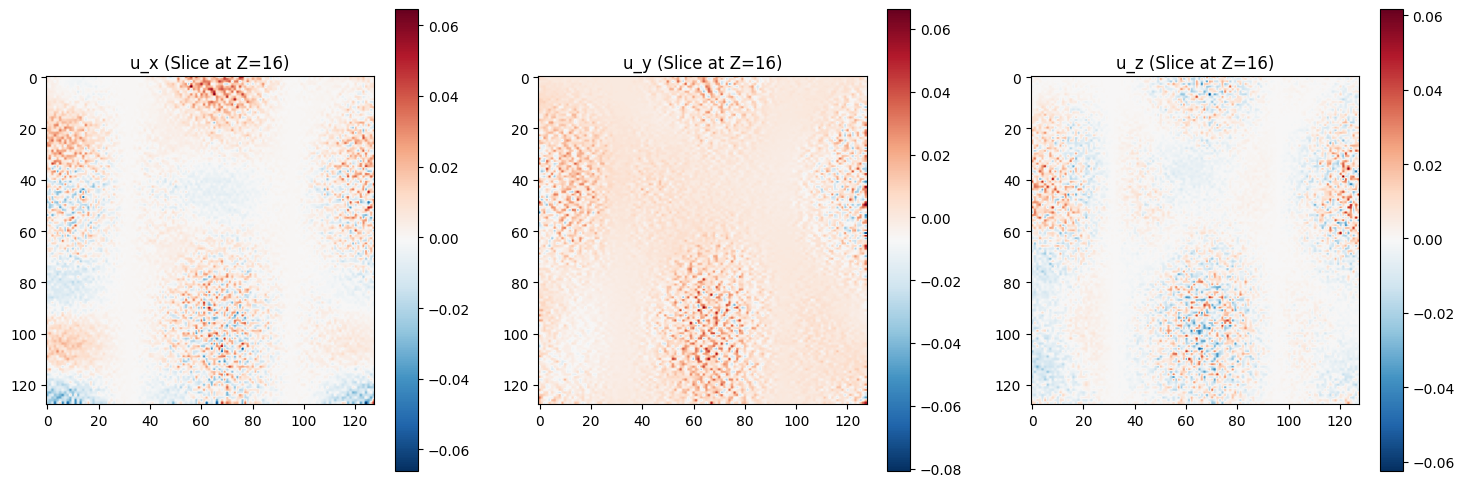

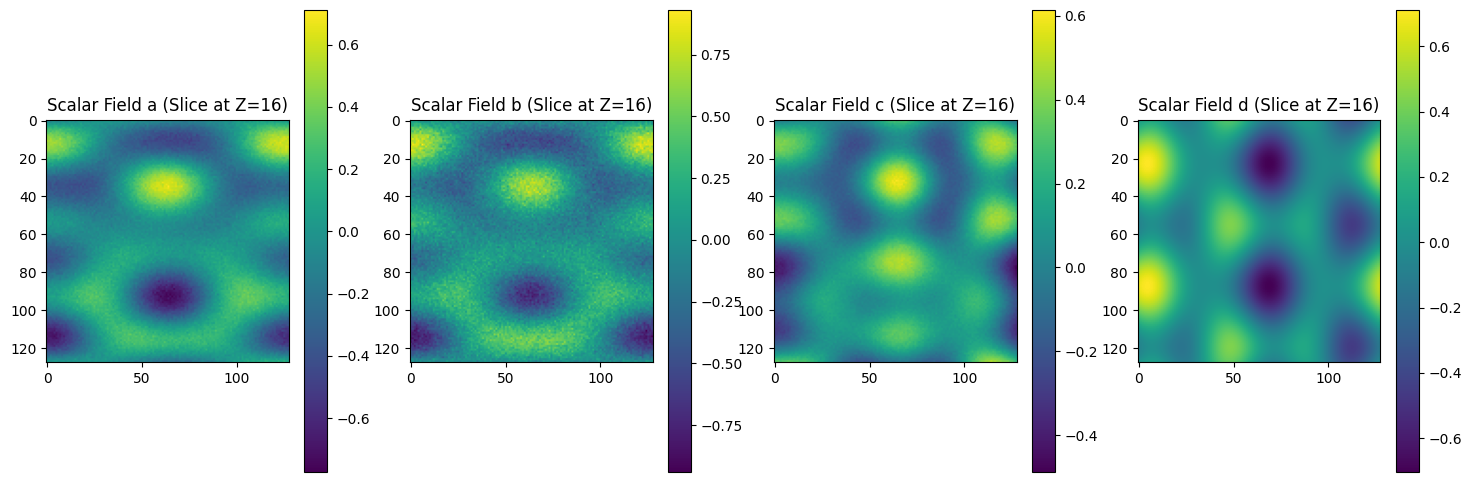

In [11]:
# 示例使用：可视化已生成的样本
velocity_file = 'data/processed/train/velocities/sample_1_u.npy'
abcd_file = 'data/processed/train/abcd/sample_10_abcd.npy'


visualize_npy_files(velocity_file, abcd_file, slice_index=16)

In [12]:
# 调试信息
velocity = np.load(velocity_file)
a = np.load(abcd_file)[0]

print("Max of u_x:", np.max(velocity[0]), "Min of u_x:", np.min(velocity[0]))
print("Max of a:", np.max(a), "Min of a:", np.min(a))

Max of u_x: 0.16612882156592568 Min of u_x: -0.10752522227347336
Max of a: 0.9909105065489455 Min of a: -1.0


In [13]:
grad_a = compute_gradient(a)
print("Max of grad_a:", np.max(grad_a), "Min of grad_a:", np.min(grad_a))

# 手动计算并检查 u 的值
u_manual, a, b, c, d = generate_sample(hbar, grid_size)
grad_a_manual = compute_gradient(a)
grad_b_manual = compute_gradient(b)
grad_c_manual = compute_gradient(c)
grad_d_manual = compute_gradient(d)

u_check = hbar * (a * grad_b_manual - b * grad_a_manual + c * grad_d_manual - d * grad_c_manual)
print("Max of u_check:", np.max(u_check), "Min of u_check:", np.min(u_check))

Max of grad_a: 0.20166561175192155 Min of grad_a: -0.2019725203652542
Max of u_check: 0.17792332182130122 Min of u_check: -0.19161363624881644


## test 数据集

In [14]:
output_dir_test = "data/processed/test"
velocity_dir_test = os.path.join(output_dir_test, "velocities")
abcd_dir_test = os.path.join(output_dir_test, "abcd")

# 创建测试数据文件夹
os.makedirs(velocity_dir_test, exist_ok=True)
os.makedirs(abcd_dir_test, exist_ok=True)

num_samples_test = 20  # 例如生成20个测试样本

for i in range(num_samples_test):
    u, a, b, c, d = generate_sample(hbar, grid_size)
    
    # 保存测试集速度场
    velocity_path_test = os.path.join(velocity_dir_test, f"sample_{i+1}_u.npy")
    np.save(velocity_path_test, u)
    
    # 保存测试集物理量a, b, c, d
    abcd_path_test = os.path.join(abcd_dir_test, f"sample_{i+1}_abcd.npy")
    np.save(abcd_path_test, np.array([a, b, c, d]))
    
    print(f"Test sample {i+1} generated and saved.")

print("Test data generation completed.")


Test sample 1 generated and saved.
Test sample 2 generated and saved.
Test sample 3 generated and saved.
Test sample 4 generated and saved.
Test sample 5 generated and saved.
Test sample 6 generated and saved.
Test sample 7 generated and saved.
Test sample 8 generated and saved.
Test sample 9 generated and saved.
Test sample 10 generated and saved.
Test sample 11 generated and saved.
Test sample 12 generated and saved.
Test sample 13 generated and saved.
Test sample 14 generated and saved.
Test sample 15 generated and saved.
Test sample 16 generated and saved.
Test sample 17 generated and saved.
Test sample 18 generated and saved.
Test sample 19 generated and saved.
Test sample 20 generated and saved.
Test data generation completed.


In [ ]:
# 示例使用：可视化已生成的样本
velocity_file = 'data/processed/test/velocities/sample_1_u.npy'
abcd_file = 'data/processed/test/abcd/sample_10_abcd.npy'


visualize_npy_files(velocity_file, abcd_file, slice_index=16)

# 批量可视化和保存


In [19]:
# 可视化并保存函数
def visualize_and_save_npy_files(velocity_file, abcd_file, slice_index=16, save_dir=None, prefix="sample"):
    """
    可视化速度场和物理量的某个二维切片，并保存为图片。
    
    :param velocity_file: 速度场的 .npy 文件路径
    :param abcd_file: 物理量 (a, b, c, d) 的 .npy 文件路径
    :param slice_index: 要可视化的切片索引
    :param save_dir: 图片保存的目录。如果为 None，则不保存图片。
    :param prefix: 保存图片文件的前缀名。
    """
    # 读取 .npy 文件
    velocity = np.load(velocity_file)
    abcd = np.load(abcd_file)
    
    # 提取速度场分量
    u_x, u_y, u_z = velocity
    
    # 提取物理量 a, b, c, d
    a, b, c, d = abcd
    
    # 创建保存目录
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
    
    # 可视化速度场分量的切片
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(u_x[:, :, slice_index], cmap="RdBu_r")
    plt.colorbar()
    plt.title(f"u_x (Slice at Z={slice_index})")
    # if save_dir:
        # plt.savefig(os.path.join(save_dir, f"{prefix}_ux.png"))

    plt.subplot(1, 3, 2)
    plt.imshow(u_y[:, :, slice_index], cmap="RdBu_r")
    plt.colorbar()
    plt.title(f"u_y (Slice at Z={slice_index})")
    # if save_dir:
        # plt.savefig(os.path.join(save_dir, f"{prefix}_uy.png"))

    plt.subplot(1, 3, 3)
    plt.imshow(u_z[:, :, slice_index], cmap="RdBu_r")
    plt.colorbar()
    plt.title(f"u_z (Slice at Z={slice_index})")
    # if save_dir:
    #     plt.savefig(os.path.join(save_dir, f"{prefix}_uz.png"))

    if save_dir:
        plt.savefig(os.path.join(save_dir, f"{prefix}_uxyz.png"))
    plt.show()
    
    # 可视化物理量的切片
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 4, 1)
    plt.imshow(a[:, :, slice_index], cmap="viridis")
    plt.colorbar()
    plt.title(f"Scalar Field a (Slice at Z={slice_index})")
    # if save_dir:
    #     plt.savefig(os.path.join(save_dir, f"{prefix}_a.png"))
    
    plt.subplot(1, 4, 2)
    plt.imshow(b[:, :, slice_index], cmap="viridis")
    plt.colorbar()
    plt.title(f"Scalar Field b (Slice at Z={slice_index})")
    # if save_dir:
        # plt.savefig(os.path.join(save_dir, f"{prefix}_b.png"))
    
    plt.subplot(1, 4, 3)
    plt.imshow(c[:, :, slice_index], cmap="viridis")
    plt.colorbar()
    plt.title(f"Scalar Field c (Slice at Z={slice_index})")
    # if save_dir:
        # plt.savefig(os.path.join(save_dir, f"{prefix}_c.png"))
    
    plt.subplot(1, 4, 4)
    plt.imshow(d[:, :, slice_index], cmap="viridis")
    plt.colorbar()
    plt.title(f"Scalar Field d (Slice at Z={slice_index})")
    # if save_dir:
        # plt.savefig(os.path.join(save_dir, f"{prefix}_d.png"))
    
    if save_dir:
        plt.savefig(os.path.join(save_dir, f"{prefix}_abcd.png"))
    plt.show()

In [ ]:
# 为所有训练集样本生成并保存图片
for i in range(num_samples):
    velocity_file = f'data/processed/train/velocities/sample_{i+1}_u.npy'
    abcd_file = f'data/processed/train/abcd/sample_{i+1}_abcd.npy'
    save_dir = f'data/figure/train/images/sample_{i+1}'

    visualize_and_save_npy_files(velocity_file, abcd_file, slice_index=16, save_dir=save_dir)


In [8]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from PIL import Image

# 常量设定
hbar = 1.0  # 普朗克常数，或者任何常数
grid_size = (1024, 1024, 1024)  # 网格大小，可以根据需要调整
num_samples = 100  # 数据集样本数量
num_samples_test = 20  # 测试集样本数量

# 文件路径
output_dir_train = "data/figure/train1"
velocity_dir_train = os.path.join(output_dir_train, "velocities")
abcd_dir_train = os.path.join(output_dir_train, "abcd")

output_dir_test = "data/figure/test1"
velocity_dir_test = os.path.join(output_dir_test, "velocities")
abcd_dir_test = os.path.join(output_dir_test, "abcd")

# 创建文件夹
os.makedirs(velocity_dir_train, exist_ok=True)
os.makedirs(abcd_dir_train, exist_ok=True)
os.makedirs(velocity_dir_test, exist_ok=True)
os.makedirs(abcd_dir_test, exist_ok=True)

def generate_simple_field(size):
    x = np.linspace(0, 2 * np.pi, size[0])
    y = np.linspace(0, 2 * np.pi, size[1])
    z = np.linspace(0, 2 * np.pi, size[2])
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

    freq = random.uniform(0.5, 2.0)
    phase = random.uniform(0, 2 * np.pi)
    
    field = (np.sin(freq * X + phase) + np.cos(freq * Y + phase)) * np.cos(Y) * np.sin(Z)
    return field

def generate_complex_field(size):
    x = np.linspace(0, 2 * np.pi, size[0])
    y = np.linspace(0, 2 * np.pi, size[1])
    z = np.linspace(0, 2 * np.pi, size[2])
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
    
    field = (np.sin(X) * np.cos(2 * Y) * np.sin(3 * Z) +
             np.sin(2 * X) * np.cos(Y) * np.sin(Z) +
             np.sin(3 * X) * np.cos(Y) * np.sin(2 * Z))
    
    noise_std = random.uniform(0.05, 0.2)
    noise = np.random.normal(0, noise_std, size)
    field += noise
    
    return field

def generate_random_field(size):
    field = np.zeros(size)
    for _ in range(random.randint(1, 3)):  # 随机选择1到3个场组合
        if random.choice([True, False]):
            field += generate_simple_field(size)
        else:
            field += generate_complex_field(size)
    return field / np.max(np.abs(field))

def compute_gradient(field):
    grad = np.gradient(field)
    return np.array(grad)  # 返回梯度向量场

def generate_sample(hbar, grid_size):
    a = generate_random_field(grid_size)
    b = generate_random_field(grid_size)
    c = generate_random_field(grid_size)
    d = generate_random_field(grid_size)
    
    grad_a = compute_gradient(a)
    grad_b = compute_gradient(b)
    grad_c = compute_gradient(c)
    grad_d = compute_gradient(d)
    
    u = hbar * (a * grad_b - b * grad_a + c * grad_d - d * grad_c)
    
    return u, a, b, c, d

def save_field_as_image(field, slice_index, save_path):
    plt.figure(figsize=(8, 8))
    plt.imshow(field[:, :, slice_index], cmap="RdBu_r", aspect='auto', interpolation='bilinear')
    plt.axis('off')
    temp_path = save_path
    plt.savefig(temp_path, bbox_inches='tight', pad_inches=0, dpi=200, format='png', transparent=False)
    plt.close()
    img = Image.open(temp_path).convert('RGB')
    img.save(save_path, format='png')
    

# 为所有训练集样本生成并保存图片
for i in range(num_samples):
    velocity_file = f'data/processed/train/velocities/sample_{i+1}_u.npy'
    abcd_file = f'data/processed/train/abcd/sample_{i+1}_abcd.npy'
    
    # 读取数据
    velocity = np.load(velocity_file)
    abcd = np.load(abcd_file)

    # 分别保存速度场分量
    save_field_as_image(velocity[0], 16, os.path.join(velocity_dir_train, f"ux_{i+1}.png"))
    save_field_as_image(velocity[1], 16, os.path.join(velocity_dir_train, f"uy_{i+1}.png"))
    save_field_as_image(velocity[2], 16, os.path.join(velocity_dir_train, f"uz_{i+1}.png"))

    # 分别保存abcd分量
    save_field_as_image(abcd[0], 16, os.path.join(abcd_dir_train, f"a_{i+1}.png"))
    save_field_as_image(abcd[1], 16, os.path.join(abcd_dir_train, f"b_{i+1}.png"))
    save_field_as_image(abcd[2], 16, os.path.join(abcd_dir_train, f"c_{i+1}.png"))
    save_field_as_image(abcd[3], 16, os.path.join(abcd_dir_train, f"d_{i+1}.png"))

# 为所有测试集样本生成并保存图片
for i in range(num_samples_test):
    velocity_file = f'data/processed/test/velocities/sample_{i+1}_u.npy'
    abcd_file = f'data/processed/test/abcd/sample_{i+1}_abcd.npy'
    
    # 读取数据
    velocity = np.load(velocity_file)
    abcd = np.load(abcd_file)

    # 分别保存速度场分量
    save_field_as_image(velocity[0], 16, os.path.join(velocity_dir_test, f"ux_{i+1}.png"))
    save_field_as_image(velocity[1], 16, os.path.join(velocity_dir_test, f"uy_{i+1}.png"))
    save_field_as_image(velocity[2], 16, os.path.join(velocity_dir_test, f"uz_{i+1}.png"))

    # 分别保存abcd分量
    save_field_as_image(abcd[0], 16, os.path.join(abcd_dir_test, f"a_{i+1}.png"))
    save_field_as_image(abcd[1], 16, os.path.join(abcd_dir_test, f"b_{i+1}.png"))
    save_field_as_image(abcd[2], 16, os.path.join(abcd_dir_test, f"c_{i+1}.png"))
    save_field_as_image(abcd[3], 16, os.path.join(abcd_dir_test, f"d_{i+1}.png"))


# 多线程转换

In [ ]:
import os
from PIL import Image

def imgConvert(img):
    img = img.convert('RGB')
    return img

def convert_images_in_directory(directory):
    # 获取目录中的所有文件名
    filenames = os.listdir(directory)

    # 逐个处理每个文件
    for filename in filenames:
        # 构建文件的完整路径
        file_path = os.path.join(directory, filename)

        # 打开图片
        with Image.open(file_path) as img:
            # 转换图片
            img_converted = imgConvert(img)
            
            # 保存图片，覆盖原有文件
            img_converted.save(file_path)

# 指定你的图片文件夹路径
directory = r"D:\zjPhD\Programzj\GLCIC-PyTorch-master\GLCIC-PyTorch\datasets\vortices\velocity\train"

# 调用转换函数
convert_images_in_directory(directory)

print("图片转换完成。")

In [21]:
import os
from PIL import Image
from multiprocessing import Pool, cpu_count

def imgConvert_and_save(file_path):
    try:
        with Image.open(file_path) as img:
            img_converted = img.convert('RGB')
            img_converted.save(file_path)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

def convert_images_in_directory(directory):
    # 获取目录中的所有文件路径
    file_paths = [os.path.join(directory, filename) for filename in os.listdir(directory)]

    # 获取 CPU 核心数量
    num_cores = cpu_count()

    # 使用多进程池并行处理
    with Pool(num_cores) as pool:
        pool.map(imgConvert_and_save, file_paths)

# 指定你的图片文件夹路径
directory = r"D:\zjPhD\Programzj\GLCIC-PyTorch-master\GLCIC-PyTorch\datasets\vortices\velocity\train"

# 调用转换函数
convert_images_in_directory(directory)

print("图片转换完成。")


In [ ]:
import os
from PIL import Image
from multiprocessing import Pool, cpu_count

def imgConvert_and_save(file_path):
    try:
        with Image.open(file_path) as img:
            img_converted = img.convert('RGB')
            img_converted.save(file_path)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

def convert_images_in_directory(directory):
    # 获取目录中的所有文件路径
    file_paths = [os.path.join(directory, filename) for filename in os.listdir(directory)]

    # 获取 CPU 核心数量
    num_cores = cpu_count()

    # 使用多进程池并行处理
    with Pool(num_cores) as pool:
        pool.map(imgConvert_and_save, file_paths)

# 指定你的图片文件夹路径
directory = r"D:\zjPhD\Programzj\GLCIC-PyTorch-master\GLCIC-PyTorch\datasets\vortices\velocity\test"

# 调用转换函数
convert_images_in_directory(directory)

print("图片转换完成。")


In [ ]:
import os
from PIL import Image
from multiprocessing import Pool, cpu_count

def imgConvert_and_save(file_path):
    try:
        with Image.open(file_path) as img:
            img_converted = img.convert('RGB')
            img_converted.save(file_path)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

def convert_images_in_directory(directory):
    # 获取目录中的所有文件路径
    file_paths = [os.path.join(directory, filename) for filename in os.listdir(directory)]

    # 获取 CPU 核心数量
    num_cores = cpu_count()

    # 使用多进程池并行处理
    with Pool(num_cores) as pool:
        pool.map(imgConvert_and_save, file_paths)

# 指定你的图片文件夹路径
directory = r"D:\zjPhD\Programzj\GLCIC-PyTorch-master\GLCIC-PyTorch\datasets\vortices\abcd\train"

# 调用转换函数
convert_images_in_directory(directory)

print("图片转换完成。")


In [ ]:
import os
from PIL import Image
from multiprocessing import Pool, cpu_count

def imgConvert_and_save(file_path):
    try:
        with Image.open(file_path) as img:
            img_converted = img.convert('RGB')
            img_converted.save(file_path)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

def convert_images_in_directory(directory):
    # 获取目录中的所有文件路径
    file_paths = [os.path.join(directory, filename) for filename in os.listdir(directory)]

    # 获取 CPU 核心数量
    num_cores = cpu_count()

    # 使用多进程池并行处理
    with Pool(num_cores) as pool:
        pool.map(imgConvert_and_save, file_paths)

# 指定你的图片文件夹路径
directory = r"D:\zjPhD\Programzj\GLCIC-PyTorch-master\GLCIC-PyTorch\datasets\vortices\abcd\train"

# 调用转换函数
convert_images_in_directory(directory)

print("图片转换完成。")


In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

# 定义简单的CNN模型
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=2, stride=2),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 自定义数据集类，用于加载训练和测试图像

import os
import imghdr
import torch.utils.data as data
from PIL import Image


class ImageDataset(data.Dataset):
    def __init__(self, data_dir, transform=None, recursive_search=False):
        super(ImageDataset, self).__init__()
        self.data_dir = os.path.expanduser(data_dir)
        self.transform = transform
        self.imgpaths = self.__load_imgpaths_from_dir(self.data_dir, walk=recursive_search)

    def __len__(self):
        return len(self.imgpaths)

    def __getitem__(self, index, color_format='RGB'):
        img = Image.open(self.imgpaths[index])
        img = img.convert(color_format)
        if self.transform is not None:
            img = self.transform(img)
        
        # 生成随机掩码
        mask = self.generate_random_mask(img.size(1), img.size(2))  # img.size返回 (C, H, W)，使用H和W
        mask = transforms.ToTensor()(mask)

        masked_image = img * mask  # 应用掩码
        return masked_image, img  # 返回带掩码的图像和原始图像

    def generate_random_mask(self, height, width):
        """
        生成与输入图像尺寸一致的随机遮罩
        """
        mask = np.ones((height, width), dtype=np.float32)
        num_holes = np.random.randint(1, 4)  # 随机生成1到3个遮掩区域
        for _ in range(num_holes):
            x, y = np.random.randint(0, width), np.random.randint(0, height)
            w, h = np.random.randint(10, width // 2), np.random.randint(10, height // 2)
            mask[y:y+h, x:x+w] = 0
        return Image.fromarray(mask)

    def __is_imgfile(self, filepath):
        filepath = os.path.expanduser(filepath)
        if os.path.isfile(filepath) and imghdr.what(filepath):
            return True
        return False

    def __load_imgpaths_from_dir(self, dirpath, walk=False):
        imgpaths = []
        dirpath = os.path.expanduser(dirpath)
        if walk:
            for (root, _, files) in os.walk(dirpath):
                for file in files:
                    file = os.path.join(root, file)
                    if self.__is_imgfile(file):
                        imgpaths.append(file)
        else:
            for path in os.listdir(dirpath):
                path = os.path.join(dirpath, path)
                if not self.__is_imgfile(path):
                    continue
                imgpaths.append(path)
        return imgpaths



# 数据准备
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # 统一大小
    transforms.ToTensor(),
])

train_dir = 'D:/zjPhD/Programzj/GLCIC-PyTorch-master/GLCIC-PyTorch/datasets/vortices1/velocity/train'
test_dir = 'D:/zjPhD/Programzj/GLCIC-PyTorch-master/GLCIC-PyTorch/datasets/vortices1/velocity/test'

train_dataset = ImageDataset(train_dir, transform=transform)
test_dataset = ImageDataset(test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 模型、损失函数和优化器
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        # print(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

# 测试模型
sample_image, sample_target = test_dataset[0]
sample_image = sample_image.unsqueeze(0).to(device)
output = model(sample_image).detach().cpu().squeeze(0).squeeze(0)



Epoch 1/10, Loss: 0.1497
Epoch 2/10, Loss: 0.0821
Epoch 3/10, Loss: 0.0206
Epoch 4/10, Loss: 0.0166
Epoch 5/10, Loss: 0.0156
Epoch 6/10, Loss: 0.0140
Epoch 7/10, Loss: 0.0122
Epoch 8/10, Loss: 0.0103
Epoch 9/10, Loss: 0.0089
Epoch 10/10, Loss: 0.0080


In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

# 定义简单的CNN模型
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.3),  # 添加 Dropout 层
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.3)   # 添加 Dropout 层
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Dropout(0.3),  # 添加 Dropout 层
            nn.ConvTranspose2d(32, 3, kernel_size=2, stride=2),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 自定义数据集类，用于加载训练和测试图像
import os
import imghdr
import torch.utils.data as data
from PIL import Image

class ImageDataset(data.Dataset):
    def __init__(self, data_dir, transform=None, recursive_search=False):
        super(ImageDataset, self).__init__()
        self.data_dir = os.path.expanduser(data_dir)
        self.transform = transform
        self.imgpaths = self.__load_imgpaths_from_dir(self.data_dir, walk=recursive_search)

    def __len__(self):
        return len(self.imgpaths)

    def __getitem__(self, index, color_format='RGB'):
        img = Image.open(self.imgpaths[index])
        img = img.convert(color_format)
        if self.transform is not None:
            img = self.transform(img)
        
        # 生成随机掩码
        mask = self.generate_random_mask(img.size(1), img.size(2))  # img.size返回 (C, H, W)，使用H和W
        mask = transforms.ToTensor()(mask)

        masked_image = img * mask  # 应用掩码
        return masked_image, img  # 返回带掩码的图像和原始图像

    def generate_random_mask(self, height, width):
        """
        生成与输入图像尺寸一致的随机遮罩
        """
        mask = np.ones((height, width), dtype=np.float32)
        num_holes = np.random.randint(1, 4)  # 随机生成1到3个遮掩区域
        for _ in range(num_holes):
            x, y = np.random.randint(0, width), np.random.randint(0, height)
            w, h = np.random.randint(10, width // 2), np.random.randint(10, height // 2)
            mask[y:y+h, x:x+w] = 0
        return Image.fromarray(mask)

    def __is_imgfile(self, filepath):
        filepath = os.path.expanduser(filepath)
        if os.path.isfile(filepath) and imghdr.what(filepath):
            return True
        return False

    def __load_imgpaths_from_dir(self, dirpath, walk=False):
        imgpaths = []
        dirpath = os.path.expanduser(dirpath)
        if walk:
            for (root, _, files) in os.walk(dirpath):
                for file in files:
                    file = os.path.join(root, file)
                    if self.__is_imgfile(file):
                        imgpaths.append(file)
        else:
            for path in os.listdir(dirpath):
                path = os.path.join(dirpath, path)
                if not self.__is_imgfile(path):
                    continue
                imgpaths.append(path)
        return imgpaths

# 数据准备
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # 统一大小
    transforms.ToTensor(),
])

train_dir = 'D:/zjPhD/Programzj/GLCIC-PyTorch-master/GLCIC-PyTorch/datasets/vortices1/velocity/train'
test_dir = 'D:/zjPhD/Programzj/GLCIC-PyTorch-master/GLCIC-PyTorch/datasets/vortices1/velocity/test'

train_dataset = ImageDataset(train_dir, transform=transform)
test_dataset = ImageDataset(test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 模型、损失函数和优化器
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN().to(device)
criterion = nn.MSELoss()

# 添加L2正则化（权重衰减）
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# 训练模型
num_epochs = 50  # 增加训练周期

for epoch in range(num_epochs):
    model.train()  # 设置模型为训练模式
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)

    # 验证模型
    model.eval()  # 设置模型为评估模式
    val_loss = 0.0
    with torch.no_grad():
        for val_inputs, val_targets in test_loader:
            val_inputs, val_targets = val_inputs.to(device), val_targets.to(device)
            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs, val_targets).item() * val_inputs.size(0)
    
    val_loss /= len(test_loader.dataset)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}')

# 测试模型
model.eval()  # 设置模型为评估模式
with torch.no_grad():
    sample_image, sample_target = test_dataset[0]
    sample_image = sample_image.unsqueeze(0).to(device)
    output = model(sample_image).detach().cpu().squeeze(0)


Epoch 1/50, Train Loss: 0.1528, Val Loss: 0.1315
Epoch 2/50, Train Loss: 0.0948, Val Loss: 0.0385
Epoch 3/50, Train Loss: 0.0443, Val Loss: 0.0156
Epoch 4/50, Train Loss: 0.0285, Val Loss: 0.0150
Epoch 5/50, Train Loss: 0.0223, Val Loss: 0.0150
Epoch 6/50, Train Loss: 0.0194, Val Loss: 0.0145
Epoch 7/50, Train Loss: 0.0178, Val Loss: 0.0139
Epoch 8/50, Train Loss: 0.0166, Val Loss: 0.0127
Epoch 9/50, Train Loss: 0.0156, Val Loss: 0.0105
Epoch 10/50, Train Loss: 0.0143, Val Loss: 0.0079
Epoch 11/50, Train Loss: 0.0135, Val Loss: 0.0071
Epoch 12/50, Train Loss: 0.0129, Val Loss: 0.0070
Epoch 13/50, Train Loss: 0.0124, Val Loss: 0.0068
Epoch 14/50, Train Loss: 0.0120, Val Loss: 0.0067
Epoch 15/50, Train Loss: 0.0116, Val Loss: 0.0065
Epoch 16/50, Train Loss: 0.0111, Val Loss: 0.0063
Epoch 17/50, Train Loss: 0.0105, Val Loss: 0.0059
Epoch 18/50, Train Loss: 0.0099, Val Loss: 0.0059
Epoch 19/50, Train Loss: 0.0093, Val Loss: 0.0056
Epoch 20/50, Train Loss: 0.0087, Val Loss: 0.0054
Epoch 21/

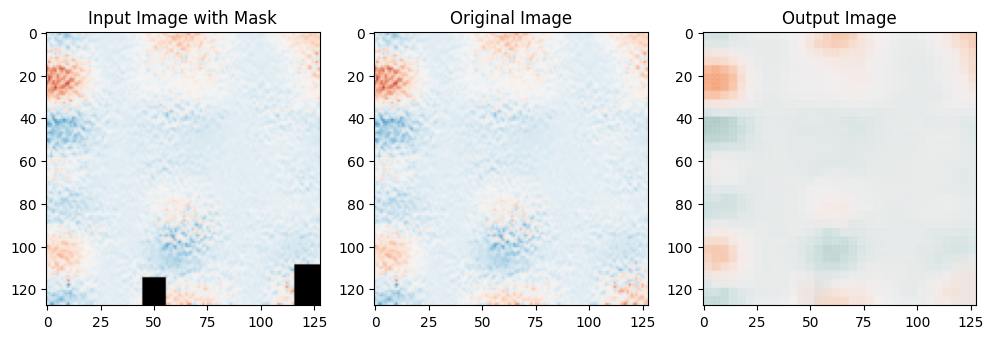

In [42]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('Input Image with Mask')
plt.imshow(sample_image.cpu().squeeze(0).permute(1, 2, 0))  # 变换维度用于显示RGB图像
plt.subplot(1, 3, 2)
plt.title('Original Image')
plt.imshow(sample_target.permute(1, 2, 0))  # 变换维度用于显示RGB图像
plt.subplot(1, 3, 3)
plt.title('Output Image')
plt.imshow(output.permute(1, 2, 0))  # 变换维度用于显示RGB图像
plt.show()

# 模型B

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
import random

# 自定义数据集类
class ImageDataset(Dataset):
    def __init__(self, velocity_dir, abcd_dir, transform=None):
        self.velocity_dir = velocity_dir
        self.abcd_dir = abcd_dir
        self.transform = transform
        self.velocity_images = sorted([f for f in os.listdir(velocity_dir) if f.endswith('.png')])
        self.abcd_images = sorted([f for f in os.listdir(abcd_dir) if f.endswith('.png')])

    def __len__(self):
        return len(self.velocity_images)

    def __getitem__(self, idx):
        # 读取速度场图像
        velocity_path = os.path.join(self.velocity_dir, self.velocity_images[idx])
        velocity_img = Image.open(velocity_path).convert('RGB')
        
        # 读取对应的abcd图像
        abcd_path = os.path.join(self.abcd_dir, self.abcd_images[idx])
        abcd_img = Image.open(abcd_path).convert('RGB')

        if self.transform:
            velocity_img = self.transform(velocity_img)
            abcd_img = self.transform(abcd_img)
        
        # 生成随机掩码
        mask = self.generate_random_mask(velocity_img.size(1), velocity_img.size(2))
        mask = transforms.ToTensor()(mask)
        masked_velocity_img = velocity_img * mask
        
        return masked_velocity_img, abcd_img, velocity_img

    def generate_random_mask(self, height, width):
        """
        生成与输入图像尺寸一致的随机遮罩
        """
        mask = np.ones((height, width), dtype=np.float32)
        num_holes = np.random.randint(1, 4)  # 随机生成1到3个遮掩区域
        for _ in range(num_holes):
            x, y = np.random.randint(0, width), np.random.randint(0, height)
            w, h = np.random.randint(10, width // 2), np.random.randint(10, height // 2)
            mask[y:y+h, x:x+w] = 0
        return Image.fromarray(mask)

# 数据预处理和加载
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # 统一大小
    transforms.ToTensor(),
])

train_velocity_dir = 'D:/zjPhD/Programzj/GLCIC-PyTorch-master/GLCIC-PyTorch/datasets/vortices1/velocity/train'
train_abcd_dir = 'D:/zjPhD/Programzj/GLCIC-PyTorch-master/GLCIC-PyTorch/datasets/vortices1/abcd/train'
test_velocity_dir = 'D:/zjPhD/Programzj/GLCIC-PyTorch-master/GLCIC-PyTorch/datasets/vortices1/velocity/test'
test_abcd_dir = 'D:/zjPhD/Programzj/GLCIC-PyTorch-master/GLCIC-PyTorch/datasets/vortices1/abcd/test'

train_dataset = ImageDataset(train_velocity_dir, train_abcd_dir, transform=transform)
test_dataset = ImageDataset(test_velocity_dir, test_abcd_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)




In [2]:
# 遍历训练集
for masked_velocity_img, abcd_img, velocity_img in train_loader:
    print(masked_velocity_img.shape)  # (batch_size, 3, 1232, 1240)
    print(abcd_img.shape)             # (batch_size, 4, 1232, 1240)
    print(velocity_img.shape)         # (batch_size, 3, 1232, 1240)
    break

# 遍历测试集
for masked_velocity_img, abcd_img, velocity_img in test_loader:
    print(masked_velocity_img.shape)  # (batch_size, 3, 1232, 1240)
    print(abcd_img.shape)             # (batch_size, 4, 1232, 1240)
    print(velocity_img.shape)         # (batch_size, 3, 1232, 1240)
    break


torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])


In [ ]:
# 随机选择几张图像进行可视化
def visualize_samples(dataset, num_samples=5):
    plt.figure(figsize=(15, num_samples * 5))
    for i in range(num_samples):
        idx = random.randint(0, len(dataset) - 1)
        velocity_img, abcd_img, _ = dataset[idx]
        
        # 可视化速度场图像
        plt.subplot(num_samples, 2, i * 2 + 1)
        plt.imshow(velocity_img.permute(1, 2, 0).numpy())  # 转换为 (H, W, C) 以适应 matplotlib
        plt.title(f"Velocity Image {idx}")
        
        # 可视化 abcd 图像，显示其中一个通道，例如 a
        plt.subplot(num_samples, 2, i * 2 + 2)
        plt.imshow(abcd_img[0, :, :].numpy(), cmap='gray')  # 显示第一个通道 a
        plt.title(f"a (from abcd) Image {idx}")
    
    plt.show()

# 可视化 5 张来自训练集的样本
visualize_samples(train_dataset, num_samples=5)

# 可视化 5 张来自测试集的样本
visualize_samples(test_dataset, num_samples=5)

## 定义推断模块 (Inference Module)

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 定义推断模块 (Inference Module)
class InferenceModule(nn.Module):
    def __init__(self):
        super(InferenceModule, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(256, 4, kernel_size=3, stride=1, padding=1)  # 输出4通道，对应a, b, c, d

    def forward(self, x):
        x = F.relu(self.conv1(x))  # 输入: (batch_size, 3, H, W) -> 输出: (batch_size, 64, H, W)
        x = F.relu(self.conv2(x))  # 输出: (batch_size, 128, H/2, W/2)
        x = F.relu(self.conv3(x))  # 输出: (batch_size, 128, H/2, W/2)
        x = F.relu(self.conv4(x))  # 输出: (batch_size, 256, H/4, W/4)
        abcd = torch.sigmoid(self.conv5(x))  # 输出: (batch_size, 4, H/4, W/4)
        return abcd


### 测试一下推断模块的正确性

输入形状: torch.Size([32, 3, 128, 128])
输出形状: torch.Size([32, 4, 128, 128])


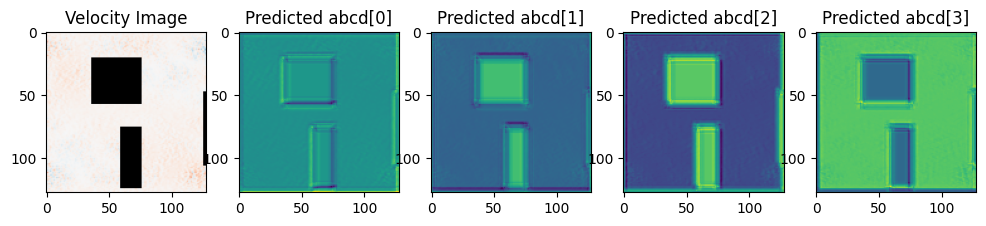

In [24]:
import torch

# 创建推断模块的实例
inference_module = InferenceModule()

# 将模型移动到GPU（如果可用）
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
inference_module = inference_module.to(device)

# 加载数据集中的一批数据
# 注意：确保train_loader已经定义且数据集已经加载正确
for batch in train_loader:
    velocity_img = batch[0].to(device)  # 获取第一个元素，即速度场图像，并将其移动到GPU（如果可用）
    break  # 只需要一批数据进行测试

# 前向传播测试
abcd_output = inference_module(velocity_img)

# 打印输入和输出的形状
print(f"输入形状: {velocity_img.shape}")  # 应该是 (batch_size, 3, 128, 128)
print(f"输出形状: {abcd_output.shape}")  # 应该是 (batch_size, 4, H', W')

# 可视化部分输入和输出
import matplotlib.pyplot as plt

# 将tensor转换为numpy数组
velocity_img_np = velocity_img[0].cpu().permute(1, 2, 0).numpy()  # 选取第一个样本并转换为numpy格式
abcd_output_np = abcd_output[0].cpu().detach().numpy()  # 选取第一个样本并转换为numpy格式

# 绘制速度场图像和推断出的abcd
plt.figure(figsize=(12, 8))

plt.subplot(1, 5, 1)
plt.imshow(velocity_img_np)
plt.title('Velocity Image')

for i in range(4):
    plt.subplot(1, 5, i + 2)
    plt.imshow(abcd_output_np[i], cmap='viridis')
    plt.title(f'Predicted abcd[{i}]')

plt.show()


## 梯度计算模块（Gradient Module）

In [26]:
# 定义梯度计算模块 (Gradient Module)
class GradientModule(nn.Module):
    def __init__(self):
        super(GradientModule, self).__init__()

    def forward(self, abcd):
        # 计算每个通道的梯度，假设abcd.shape是 (batch_size, 4, H, W)
        grad_a_x, grad_a_y = torch.gradient(abcd[:, 0, :, :], dim=(1, 2))
        grad_b_x, grad_b_y = torch.gradient(abcd[:, 1, :, :], dim=(1, 2))
        grad_c_x, grad_c_y = torch.gradient(abcd[:, 2, :, :], dim=(1, 2))
        grad_d_x, grad_d_y = torch.gradient(abcd[:, 3, :, :], dim=(1, 2))
        
        # 拼接x方向和y方向的梯度信息，最后得到形状为 (batch_size, 8, H, W)
        grad_a = torch.cat((grad_a_x.unsqueeze(1), grad_a_y.unsqueeze(1)), dim=1)
        grad_b = torch.cat((grad_b_x.unsqueeze(1), grad_b_y.unsqueeze(1)), dim=1)
        grad_c = torch.cat((grad_c_x.unsqueeze(1), grad_c_y.unsqueeze(1)), dim=1)
        grad_d = torch.cat((grad_d_x.unsqueeze(1), grad_d_y.unsqueeze(1)), dim=1)
        
        return grad_a, grad_b, grad_c, grad_d


### 测试梯度计算模块

grad_a形状: torch.Size([32, 2, 128, 128])
grad_b形状: torch.Size([32, 2, 128, 128])
grad_c形状: torch.Size([32, 2, 128, 128])
grad_d形状: torch.Size([32, 2, 128, 128])


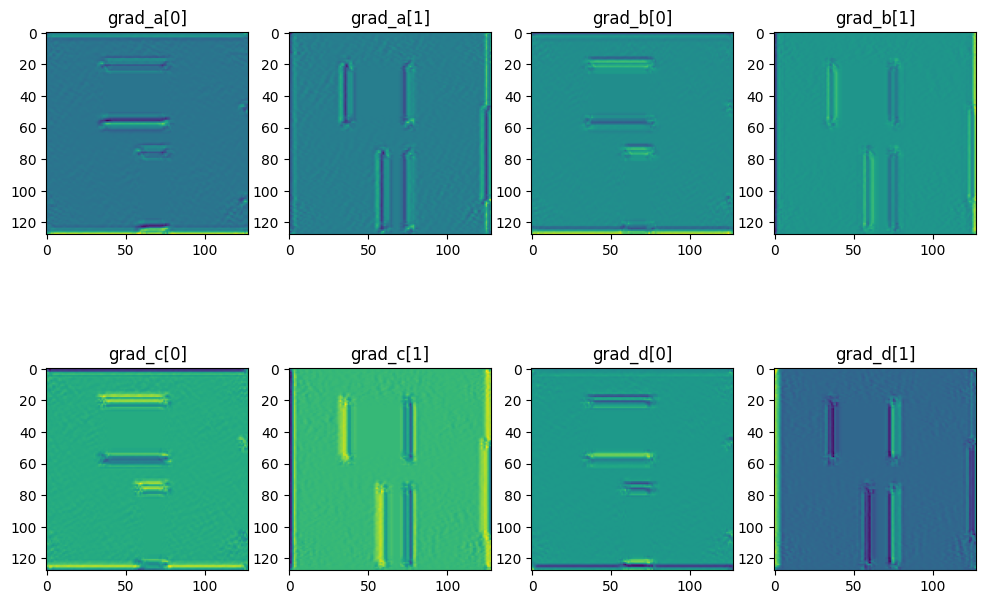

In [27]:
# 创建梯度模块的实例
gradient_module = GradientModule()

# 将模型移动到GPU（如果可用）
gradient_module = gradient_module.to(device)

# 使用推断模块生成的abcd_output作为输入
grad_a, grad_b, grad_c, grad_d = gradient_module(abcd_output)

# 打印输出的形状
print(f"grad_a形状: {grad_a.shape}")  # 应该是 (batch_size, 2, H, W)
print(f"grad_b形状: {grad_b.shape}")  # 应该是 (batch_size, 2, H, W)
print(f"grad_c形状: {grad_c.shape}")  # 应该是 (batch_size, 2, H, W)
print(f"grad_d形状: {grad_d.shape}")  # 应该是 (batch_size, 2, H, W)

# 可视化梯度信息
import matplotlib.pyplot as plt

# 选择一个样本的梯度信息
grad_a_np = grad_a[0].cpu().detach().numpy()
grad_b_np = grad_b[0].cpu().detach().numpy()
grad_c_np = grad_c[0].cpu().detach().numpy()
grad_d_np = grad_d[0].cpu().detach().numpy()

# 绘制梯度信息
plt.figure(figsize=(12, 8))

for i in range(2):
    plt.subplot(2, 4, i + 1)
    plt.imshow(grad_a_np[i], cmap='viridis')
    plt.title(f'grad_a[{i}]')
    
    plt.subplot(2, 4, i + 3)
    plt.imshow(grad_b_np[i], cmap='viridis')
    plt.title(f'grad_b[{i}]')
    
    plt.subplot(2, 4, i + 5)
    plt.imshow(grad_c_np[i], cmap='viridis')
    plt.title(f'grad_c[{i}]')
    
    plt.subplot(2, 4, i + 7)
    plt.imshow(grad_d_np[i], cmap='viridis')
    plt.title(f'grad_d[{i}]')

plt.show()

## 补全模块（Completion Module）

In [28]:
# 定义补全模块 (Completion Module)
class CompletionModule(nn.Module):
    def __init__(self):
        super(CompletionModule, self).__init__()
        self.conv1 = nn.Conv2d(15, 64, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1)
        self.deconv5 = nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1)
        self.deconv6 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.conv7 = nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1)

    def forward(self, x, abcd, grad_a, grad_b, grad_c, grad_d):
        # 确保所有张量的尺寸匹配
        target_size = x.shape[2:]
        abcd_upsampled = F.interpolate(abcd, size=target_size, mode='bilinear', align_corners=False)
        grad_a_upsampled = F.interpolate(grad_a, size=target_size, mode='bilinear', align_corners=False)
        grad_b_upsampled = F.interpolate(grad_b, size=target_size, mode='bilinear', align_corners=False)
        grad_c_upsampled = F.interpolate(grad_c, size=target_size, mode='bilinear', align_corners=False)
        grad_d_upsampled = F.interpolate(grad_d, size=target_size, mode='bilinear', align_corners=False)

        # 拼接速度场、abcd以及梯度信息作为输入
        x = torch.cat([x, abcd_upsampled, grad_a_upsampled, grad_b_upsampled, grad_c_upsampled, grad_d_upsampled], dim=1)
        
        # 应用卷积和反卷积层生成补全后的速度场
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.deconv5(x))
        x = F.relu(self.deconv6(x))
        output = torch.sigmoid(self.conv7(x))  # 最终输出的补全速度场
        
        return output


### 测试补全模块

完成后的速度场形状: torch.Size([32, 3, 128, 128])


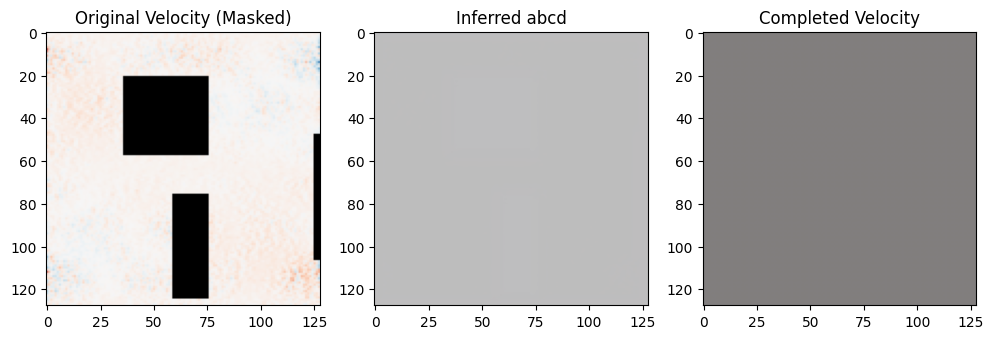

In [29]:
# 创建补全模块的实例
completion_module = CompletionModule()

# 将模型移动到GPU（如果可用）
completion_module = completion_module.to(device)

# 进行前向传播测试
with torch.no_grad():
    completed_velocity = completion_module(velocity_img, abcd_output, grad_a, grad_b, grad_c, grad_d)

# 打印输出的形状，确保与输入的速度场形状一致
print(f"完成后的速度场形状: {completed_velocity.shape}")  # 应该是 (batch_size, 3, H, W)

# 可视化补全后的速度场
import matplotlib.pyplot as plt

# 选择一个样本进行可视化
completed_velocity_np = completed_velocity[0].cpu().detach().numpy()

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('Original Velocity (Masked)')
plt.imshow(velocity_img[0].cpu().permute(1, 2, 0).detach().numpy())

plt.subplot(1, 3, 2)
plt.title('Inferred abcd')
plt.imshow(abcd_output[0].cpu().permute(1, 2, 0).detach().numpy())

plt.subplot(1, 3, 3)
plt.title('Completed Velocity')
plt.imshow(completed_velocity_np.transpose(1, 2, 0))

plt.show()


In [19]:
a = abcd_output[0].cpu().permute(1, 2, 0).detach().numpy().copy()

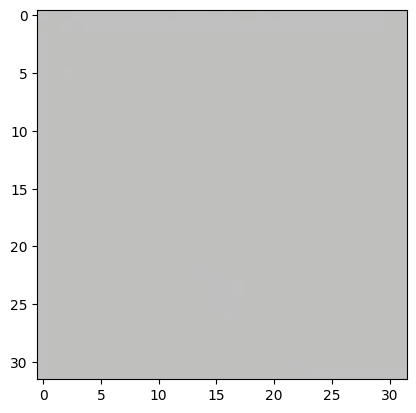

In [20]:
plt.imshow(a)

## 综合

In [30]:
class CompleteModel(nn.Module):
    def __init__(self):
        super(CompleteModel, self).__init__()
        self.inference_module = InferenceModule()
        self.gradient_module = GradientModule()
        self.completion_module = CompletionModule()

    def forward(self, x):
        abcd_pred = self.inference_module(x)
        grad_a, grad_b, grad_c, grad_d = self.gradient_module(abcd_pred)
        completed_velocity = self.completion_module(x, abcd_pred, grad_a, grad_b, grad_c, grad_d)
        return completed_velocity, abcd_pred, grad_a, grad_b, grad_c, grad_d

# 创建完整模型的实例
model = CompleteModel().to(device)


In [31]:
# 定义物理约束损失函数
def physical_constraint_loss(abcd_pred, grad_a, grad_b, grad_c, grad_d, u_real, hbar=1.0):
    # 根据给定的物理关系式计算速度场
    u_pred = hbar * (abcd_pred[:, 0, :, :] * grad_b[:, 1, :, :] - abcd_pred[:, 1, :, :] * grad_a[:, 1, :, :] + 
                     abcd_pred[:, 2, :, :] * grad_d[:, 1, :, :] - abcd_pred[:, 3, :, :] * grad_c[:, 1, :, :])
    return nn.MSELoss()(u_pred, u_real)

# 设置损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)


In [34]:
def train_model(model, train_loader, test_loader, optimizer, criterion, device, num_epochs=50):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for masked_velocity, abcd, targets in train_loader:
            masked_velocity, abcd, targets = masked_velocity.to(device), abcd.to(device), targets.to(device)
            optimizer.zero_grad()

            # 前向传播
            completed_velocity, abcd_pred, grad_a, grad_b, grad_c, grad_d = model(masked_velocity)

            # 计算损失
            # loss_abcd = criterion(abcd_pred, abcd)
            loss_velocity = criterion(completed_velocity, targets)
            loss_physical = physical_constraint_loss(abcd_pred, grad_a, grad_b, grad_c, grad_d, targets, hbar=1.0)
            loss = loss_velocity + 0.1 * loss_abcd + 0.1 * loss_physical  # 这里的权重可以调整

            # 反向传播和优化
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * masked_velocity.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)

        # 验证模型
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for val_masked_velocity, val_abcd, val_targets in test_loader:
                val_masked_velocity, val_abcd, val_targets = val_masked_velocity.to(device), val_abcd.to(device), val_targets.to(device)
                val_completed_velocity, val_abcd_pred, val_grad_a, val_grad_b, val_grad_c, val_grad_d = model(val_masked_velocity)

                loss_abcd_val = criterion(val_abcd_pred, val_abcd)
                loss_velocity_val = criterion(val_completed_velocity, val_targets)
                val_loss += (loss_velocity_val + 0.1 * loss_abcd_val).item() * val_masked_velocity.size(0)

        val_loss /= len(test_loader.dataset)
        
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}')

# 训练模型
train_model(model, train_loader, test_loader, optimizer, criterion, device)


c:\Users\user\anaconda3\envs\pytorch\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32, 3, 128, 128])) that is different to the input size (torch.Size([32, 128, 128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (32) must match the size of tensor b (3) at non-singleton dimension 1